# Problem 2

Consider the situation where you hold a flame under a metal bar as described in class (and shown in thefigure below).  Write a program to solve the steady-state 1-dimensional heat equation to get the temperature T at each point along the bar.

The equation to solve is

$$-\alpha\frac{\partial^2T(x)}{\partial x^2} = Q(x)$$

Where $\alpha$ is the thermal diffusivity of the metal (a parameter depending upon the type of metal involved), $Q(x)$ is the heat source as a function of position, and $T(x)$ is the temperature. Take $Q(x)$ to be a delta function about 30 cm from the left of the bar. Upon discretization, the heat equation becomes the the following sparse, linear system:

$$ \frac{1}{h^2}\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & \dots & 0 & 0 \\ 1 & -2 & 1 & 0 & 0 & \dots & 0 & 0 \\ 0 & 1 & -2 & 1 & 0 & \dots & 0 & 0 \\ 0 & 0 & 1 & -2 & 1 & \dots & 0 & 0 \\ 0 & 0 & 0 & 1 & -2 & \dots & 0 & 0 \\ \vdots & \vdots & \vdots & 0 & \ddots & \ddots & \ddots & 0 \\ 0 & 0 & 0 & 0 & 0 & \dots & -2 & 1 \\ 0 & 0 & 0 & 0 & 0 & \dots & 0 & 1  \end{bmatrix}T = \frac{-1}{\alpha h} \begin{bmatrix} Q_1 \\ Q_2 \\ Q_3 \\ \vdots \\ \end{bmatrix} $$

Note that the values in the upper left and lower right are different from the rest of the matrix. This implements the boundary conditions $T_1=T_N=0$ – something you don't need to worry about to solve this problem.

**Your task:  write a program to solve this system using Gauss-Seidel iteration.  You may use the implementation and test wrapper for Jacobi posted on Blackboard as a starting point; modify the Jacobi program to implement Gauss-Seidel iteration. Use the following information as you write your program:**

- Number of nodes in the simulated metal bar:  $N = 47$.  This is the number of elements in your $Q$ vector.
- Assume the metal bar is 1.0m long.  This information and the number of points N to use will determine the finite difference distance $h$.
- Boundary conditions:  The ends of the bar are fixed at the temperature 0 C using ice cubes.  That means the boundary conditions are $T_1=T_N=0$.  You don't need to do anything special toachieve this – just solve using the above matrix.
- Assume the bar is made of 6061 aluminum.  This material has thermal diffusivity $\alpha=6.4E-5 \frac{m^2}{s}$. (6061 is a common industrial alloy of aluminum.)
- Assume all heat is applied to the one element at node 14. (This is about 30cm from the right end of the bar.) Assume the heat applied is $Q = 0.05 \frac{C}{sec}$. All other $Q$ nodes are zero.

Your program should produce a plot of temperature vs. position on rod, similar to the one shown below. Also, please report the maximum temperature along the rod.

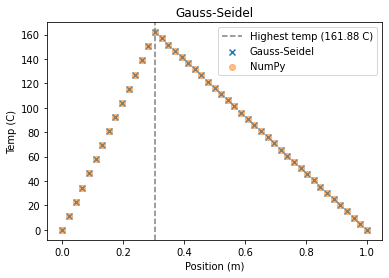

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import *

In [ ]:
def gauss_seidel(N, b, h):
    # A -> sparse matrix second deriv. of T(x) wrt x
    A = coo_matrix((N, N), dtype=np.int8).toarray()

    A[0][0] = 1
    A[-1][-1] = 1

    for i in range(1, N - 1):
        A[i][i - 1] = 1
        if i < N:
            A[i][i] = -2
        if i + 1 < N:
            A[i][i + 1] = 1

    A = A * (h**-2)

    # Gauss-Seidel translated from MATLAB code on Canvas
    L = np.tril(A, -1)
    D = np.diag(np.diag(A))
    LDm1 = np.linalg.inv(L+D)

    U = np.triu(A, 1)

    xn = b

    for idx in range(10000):
        xnp1 = np.dot(LDm1, (b - np.dot(U, xn)))
        normres = np.linalg.norm(b - np.dot(U, xn))
        if normres < 1e-5:
            break
        xn = xnp1
    return xnp1, np.linalg.solve(A, b)

# Number of nodes in the simulated metal bar: 𝑁=47
N = 47

# Assume the metal bar is 1.0m long.
length = 1

# This information and the number of points N to use will determine ℎ.
h = length / N

# Assume the bar is made of 6061 aluminum.
# This material has thermal diffusivity  𝛼=6.4𝐸−5 𝑚2/s.
alpha = 6.4e-5

# Assume all heat is applied to the one element at node 14.
# Assume the heat applied is  𝑄=0.05 𝐶/𝑠𝑒𝑐 . All other 𝑄 nodes are zero.
Q = np.zeros(N)
Q[14] = .05
Q = (-1/(alpha * h)) * Q

x, act = gauss_seidel(N, Q, h)
x_axis = np.linspace(0, 1, N)
plt.scatter(x_axis, x, label='Gauss-Seidel', alpha=1, marker='x')
max_temp_pos = np.argmax(x)
plt.axvline(x_axis[max_temp_pos],
            label=f'Highest temp ({int(max(x) * 100) / 100} C)',
            linestyle='--', color='grey')
plt.scatter(x_axis, act, label='NumPy', alpha=.5)
plt.xlabel("Position (m)")
plt.ylabel("Temp (C)")
plt.title("Gauss-Seidel")
plt.legend()

How to check your work?  Using the above inputs, I used an independent computation to find that the maximum temperature of the bar is around  160 C. Also, a good check is to run the program for varying numbers of nodes. If you have implemented the simulation correctly, then the computed temperature should be independent of the node count $N$. Now what is the max temperature if you replace Alunimum with iron, which has thermal diffusivity 2.3e-5 m2/sec?

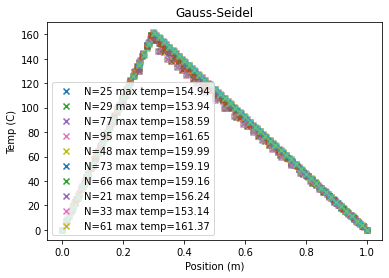

In [3]:
# If you have implemented the simulation correctly, then the computed temperature should be independent of the node count
for N in np.random.randint(low=20, high=100, size=10):
    # Assume the metal bar is 1.0m long.
    length = 1

    # This information and the number of points N to use will determine ℎ.
    h = length / N

    # Assume the bar is made of 6061 aluminum.
    # This material has thermal diffusivity  𝛼=6.4𝐸−5 𝑚2/s.
    alpha = 6.4e-5

    # Assume all heat is applied to the one element at node 14.
    # Assume the heat applied is  𝑄=0.05 𝐶/𝑠𝑒𝑐 . All other 𝑄 nodes are zero.
    Q = np.zeros(N)
    Q[int(14 * N / 47)] = .05
    Q = (-1/(alpha * h)) * Q

    x, act = gauss_seidel(N, Q, h)
    x_axis = np.linspace(0, 1, N)
    max_temp_pos = np.argmax(x)
    plt.scatter(x_axis, x, label=f'N={N} max temp={int(100*x[max_temp_pos])/100}', alpha=1, marker='x')
    plt.scatter(x_axis, act, alpha=.5)
    plt.xlabel("Position (m)")
    plt.ylabel("Temp (C)")
    plt.title("Gauss-Seidel")
    plt.legend()


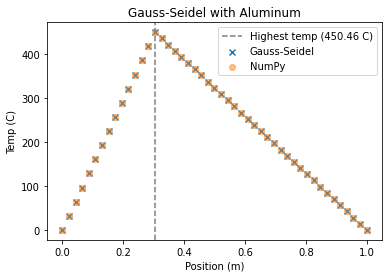

In [6]:
# What is the max temperature if you replace Alunimum with iron, which has thermal diffusivity 2.3e-5 m2/sec?

# Number of nodes in the simulated metal bar: 𝑁=47
N = 47

# Assume the metal bar is 1.0m long.
length = 1

# This information and the number of points N to use will determine ℎ.
h = length / N

alpha = 2.3e-5

# Assume all heat is applied to the one element at node 14.
# Assume the heat applied is  𝑄=0.05 𝐶/𝑠𝑒𝑐 . All other 𝑄 nodes are zero.
Q = np.zeros(N)
Q[14] = .05
Q = (-1/(alpha * h)) * Q

x, act = gauss_seidel(N, Q, h)
x_axis = np.linspace(0, 1, N)
plt.scatter(x_axis, x, label='Gauss-Seidel', alpha=1, marker='x')
max_temp_pos = np.argmax(x)
plt.axvline(x_axis[max_temp_pos],
            label=f'Highest temp ({int(max(x) * 100) / 100} C)',
            linestyle='--', color='grey')
plt.scatter(x_axis, act, label='NumPy', alpha=.5)
plt.xlabel("Position (m)")
plt.ylabel("Temp (C)")
plt.title("Gauss-Seidel with Aluminum")
plt.legend()